# Simple notebook for analyzing midway cis-eQTL effect on longevity

In [1]:
import pandas as pd

In [2]:
midway_model_table = pd.read_csv("../data/midway-survival-model-table.csv")

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

mpl.rcParams["figure.facecolor"] = "w"
mpl.rcParams["figure.dpi"] = 150
mpl.rcParams["savefig.dpi"] = 600
mpl.rcParams["savefig.transparent"] = True
mpl.rcParams["font.size"] = 15
mpl.rcParams["font.family"] = "sans-serif"
mpl.rcParams["font.sans-serif"] = ["Arial", "DejaVu Sans"]
mpl.rcParams["axes.titlesize"] = "xx-large"  # medium, large, x-large, xx-large

mpl.style.use("seaborn-deep")

/var/folders/ny/6zf1tq6n1cb0l7g7ryxbzm0h0000gn/T/ipykernel_6330/1290679250.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  mpl.style.use("seaborn-deep")


In [4]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.duration.hazard_regression import PHReg

In [5]:
replacement_map = {
    2: 1,
    1: 0,
}
midway_model_table["death"] = midway_model_table["censored"].map(replacement_map)

In [6]:
surv_df = midway_model_table

In [7]:
midway_00 = surv_df[surv_df["genotype"] == "Midway_00_"]
midway_11 = surv_df[surv_df["genotype"] == "Midway_11_"]

In [8]:
sf_00 = sm.SurvfuncRight(midway_00["lifespan"], midway_00["death"])
sf_11 = sm.SurvfuncRight(midway_11["lifespan"], midway_11["death"])

In [9]:
unique_vials = midway_00["vial"].unique()
vial_df = midway_00.groupby("vial").get_group(unique_vials[0])
vial_survival_df = pd.DataFrame(
    {
        "lifespan": range(0, 81),
        "survival": [
            1 - (len(vial_df["lifespan"][vial_df["lifespan"] < i])) / vial_df.shape[0]
            for i in range(0, 81)
        ],
    }
)

for model in unique_vials[1:]:
    vial_df = midway_00.groupby("vial").get_group(model)
    vial_survival_df = pd.concat(
        [
            vial_survival_df,
            pd.DataFrame(
                {
                    "lifespan": range(0, 81),
                    "survival": [
                        1
                        - (len(vial_df["lifespan"][vial_df["lifespan"] < i]))
                        / vial_df.shape[0]
                        for i in range(0, 81)
                    ],
                }
            ),
        ]
    )

In [10]:
unique_vials = midway_11["vial"].unique()
vial_df = midway_11.groupby("vial").get_group(unique_vials[0])
vial_survival_df_11 = pd.DataFrame(
    {
        "lifespan": range(0, 81),
        "survival": [
            1 - (len(vial_df["lifespan"][vial_df["lifespan"] < i])) / vial_df.shape[0]
            for i in range(0, 81)
        ],
    }
)

for model in unique_vials[1:]:
    vial_df = midway_11.groupby("vial").get_group(model)
    vial_survival_df_11 = pd.concat(
        [
            vial_survival_df_11,
            pd.DataFrame(
                {
                    "lifespan": range(0, 81),
                    "survival": [
                        1
                        - (len(vial_df["lifespan"][vial_df["lifespan"] < i]))
                        / vial_df.shape[0]
                        for i in range(0, 81)
                    ],
                }
            ),
        ]
    )

In [11]:
print(midway_00["lifespan"].mean())
print(midway_11["lifespan"].mean())

40.99
44.33


In [12]:
midway_00.sort_values(by=["lifespan"], inplace=True)
midway_00.iloc[99, :]

/var/folders/ny/6zf1tq6n1cb0l7g7ryxbzm0h0000gn/T/ipykernel_6330/853770876.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  midway_00.sort_values(by=['lifespan'], inplace=True)


sex                    M
date             3/29/22
vial              4._00_
genotype      Midway_00_
censored               2
lifespan              42
Unnamed: 6           NaN
Unnamed: 7           NaN
Unnamed: 8           NaN
death                  1
Name: 71, dtype: object

In [13]:
midway_11.sort_values(by=["lifespan"], inplace=True)
midway_11.iloc[99, :]

/var/folders/ny/6zf1tq6n1cb0l7g7ryxbzm0h0000gn/T/ipykernel_6330/283149305.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  midway_11.sort_values(by=['lifespan'], inplace=True)


sex                    M
date              4/1/22
vial              9._11_
genotype      Midway_11_
censored               2
lifespan              45
Unnamed: 6           NaN
Unnamed: 7           NaN
Unnamed: 8           NaN
death                  1
Name: 280, dtype: object

In [14]:
vial_survival_df["survival"] = 100 * vial_survival_df["survival"]
vial_survival_df_11["survival"] = 100 * vial_survival_df_11["survival"]

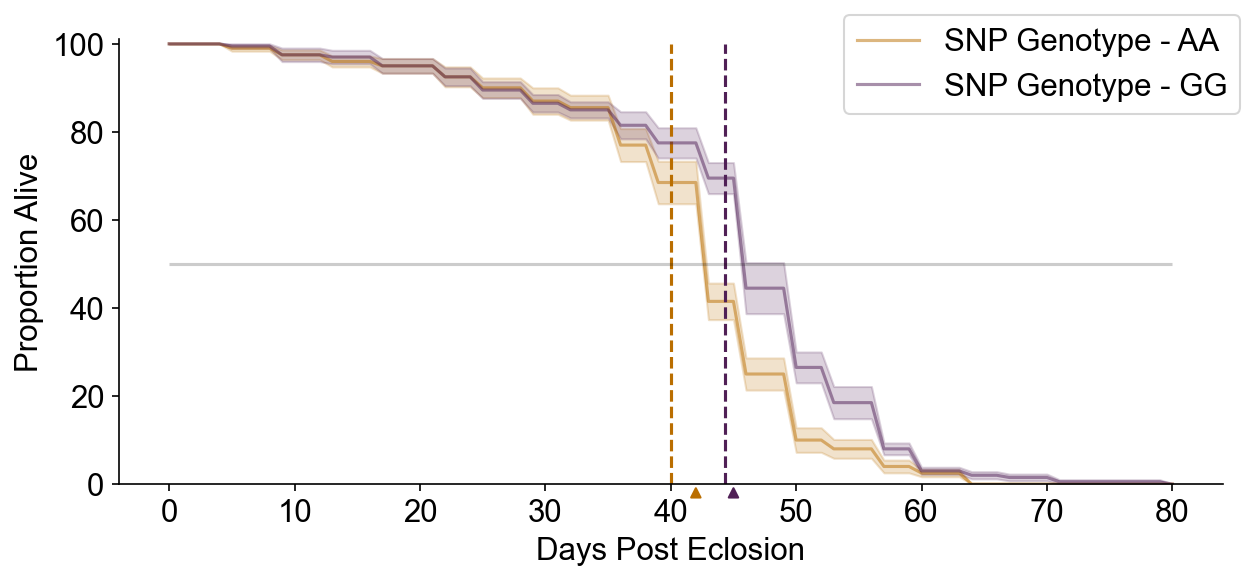

In [15]:
import palettable as pal


fig, ax = plt.subplots(figsize=(8.5, 4))
sns.lineplot(
    data=vial_survival_df,
    x="lifespan",
    y="survival",
    ax=ax,
    errorbar=("se", 1),
    color=pal.wesanderson.GrandBudapest4_5.mpl_colors[0],
    alpha=0.5,
    label="SNP Genotype - AA",
    legend=None,
)
plt.vlines(
    vial_survival_df["lifespan"].mean(),
    0,
    100,
    color=pal.wesanderson.GrandBudapest4_5.mpl_colors[0],
    linestyle="--",
)


plt.vlines(
    midway_11["lifespan"].mean(),
    0,
    100,
    color=pal.wesanderson.GrandBudapest4_5.mpl_colors[1],
    linestyle="--",
)
sns.lineplot(
    data=vial_survival_df_11,
    x="lifespan",
    y="survival",
    ax=ax,
    errorbar=("se", 1),
    color=pal.wesanderson.GrandBudapest4_5.mpl_colors[1],
    alpha=0.5,
    label="SNP Genotype - GG",
    legend=None,
)
plt.hlines(50, 0, 80, color="black", linestyle="-", alpha=0.2)
ax.annotate(
    "",
    xy=(45, 0),
    xytext=(45, -4),
    arrowprops=dict(
        arrowstyle="wedge",
        color=pal.wesanderson.GrandBudapest4_5.mpl_colors[1],
        alpha=1,
    ),
)
ax.annotate(
    "",
    xy=(42, 0),
    xytext=(42, -4),
    arrowprops=dict(
        arrowstyle="wedge",
        color=pal.wesanderson.GrandBudapest4_5.mpl_colors[0],
        alpha=1,
    ),
)
plt.ylim(0, 101)
plt.figlegend()
sns.despine()
plt.tight_layout()
plt.ylabel("Proportion Alive")
plt.xlabel("Days Post Eclosion")
plt.savefig("../figures/midway-survival.png", dpi=600, transparent=True)

In [16]:
results = PHReg.from_formula(
    "lifespan ~ C(sex) + C(genotype)", data=surv_df, status="death"
).fit()
results.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                Results: PHReg
===============================================================================
Model:                          PH Reg              Sample size:            400
Dependent variable:             lifespan            Num. events:            400
Ties:                           Breslow                                        
-------------------------------------------------------------------------------
                           log HR log HR SE   HR      t    P>|t|  [0.025 0.975]
-------------------------------------------------------------------------------
C(sex)[T.M]                0.2408    0.1013 1.2723  2.3774 0.0174 1.0432 1.5517
C(genotype)[T.Midway_11_] -0.3905    0.1017 0.6767 -3.8380 0.0001 0.5544 0.8261
===============================================================================
Confidence intervals are for the hazard ratios
"""

In [17]:
results = PHReg.from_formula(
    "lifespan ~ C(sex)*C(genotype)", data=surv_df, status="death"
).fit()
results.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                      Results: PHReg
===========================================================================================
Model:                              PH Reg                  Sample size:                400
Dependent variable:                 lifespan                Num. events:                400
Ties:                               Breslow                                                
-------------------------------------------------------------------------------------------
                                       log HR log HR SE   HR      t    P>|t|  [0.025 0.975]
-------------------------------------------------------------------------------------------
C(sex)[T.M]                            0.2487    0.1419 1.2824  1.7524 0.0797 0.9710 1.6937
C(genotype)[T.Midway_11_]             -0.3824    0.1437 0.6822 -2.6619 0.0078 0.5148 0.9041
C(sex)[T.M]:C(genotype)[T.Midway_11_] -0.0160    0.2011 0.9841 -0.0796 0.9365 0.6635 1.4597
===========================================================================================
Confidence intervals are for the hazard ratios
"""